In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d


In [2]:
# Use LaTeX for text rendering
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    "axes.labelsize": 12,
    "axes.titlesize": 18,
    "font.size": 12,
    "legend.fontsize": 12,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
})

## Parameters

In [3]:
data_folder = "./Data"

## Methods - Functions

In [4]:
def concat_data(data_folder):
    """
    Concatenate CSV files from a specified folder and year into a single DataFrame.

    Args:
        data_folder (str): Path to the folder containing the CSV files.
        year (int): Year to filter the CSV files by.

    Returns:
        pd.DataFrame: DataFrame containing concatenated data from the specified year.
    """
    
    data = pd.DataFrame()
    for file in Path(data_folder).rglob('*.csv'):
        df = pd.read_csv(file)
        data = pd.concat([data, df])

    data = data.sort_values(by="Date/Time (LST)").reset_index(drop=True)

    return data

In [10]:
def compute_power_output(wind_speed_data, x, y, start_year=2019, end_year=2023):
    """
    Compute power output for wind speed data based on a given power curve.

    Args:
        wind_speed_data (pd.DataFrame): DataFrame containing wind speed data.
        x (np.ndarray): Wind speed values for the power curve.
        y (np.ndarray): Power output values for the power curve.
        start_year (int): Start year for filtering data.
        end_year (int): End year for filtering data.

    Returns:
        pd.DataFrame: Updated DataFrame with computed power output for the filtered years.
    """
    # Filter the DataFrame for the specified years
    filtered_data = wind_speed_data[(wind_speed_data["Year"] >= start_year) & (wind_speed_data["Year"] <= end_year)]

    # Create an interpolation function based on the given power curve (x, y)
    power_curve = interp1d(x, y, kind='linear', fill_value="extrapolate")

    # Extract wind speed data from the filtered DataFrame
    wind_speeds = filtered_data["Wind Spd (km/h)"]

    # Compute power output for each wind speed
    power_output = power_curve(wind_speeds)

    # Add the computed power output to the filtered rows in the DataFrame
    wind_speed_data.loc[filtered_data.index, "Power Output (kW)"] = power_output

    # Return the updated DataFrame
    return wind_speed_data.loc[filtered_data.index, ["Date/Time (LST)", "Wind Spd (km/h)", "Power Output (kW)"]]

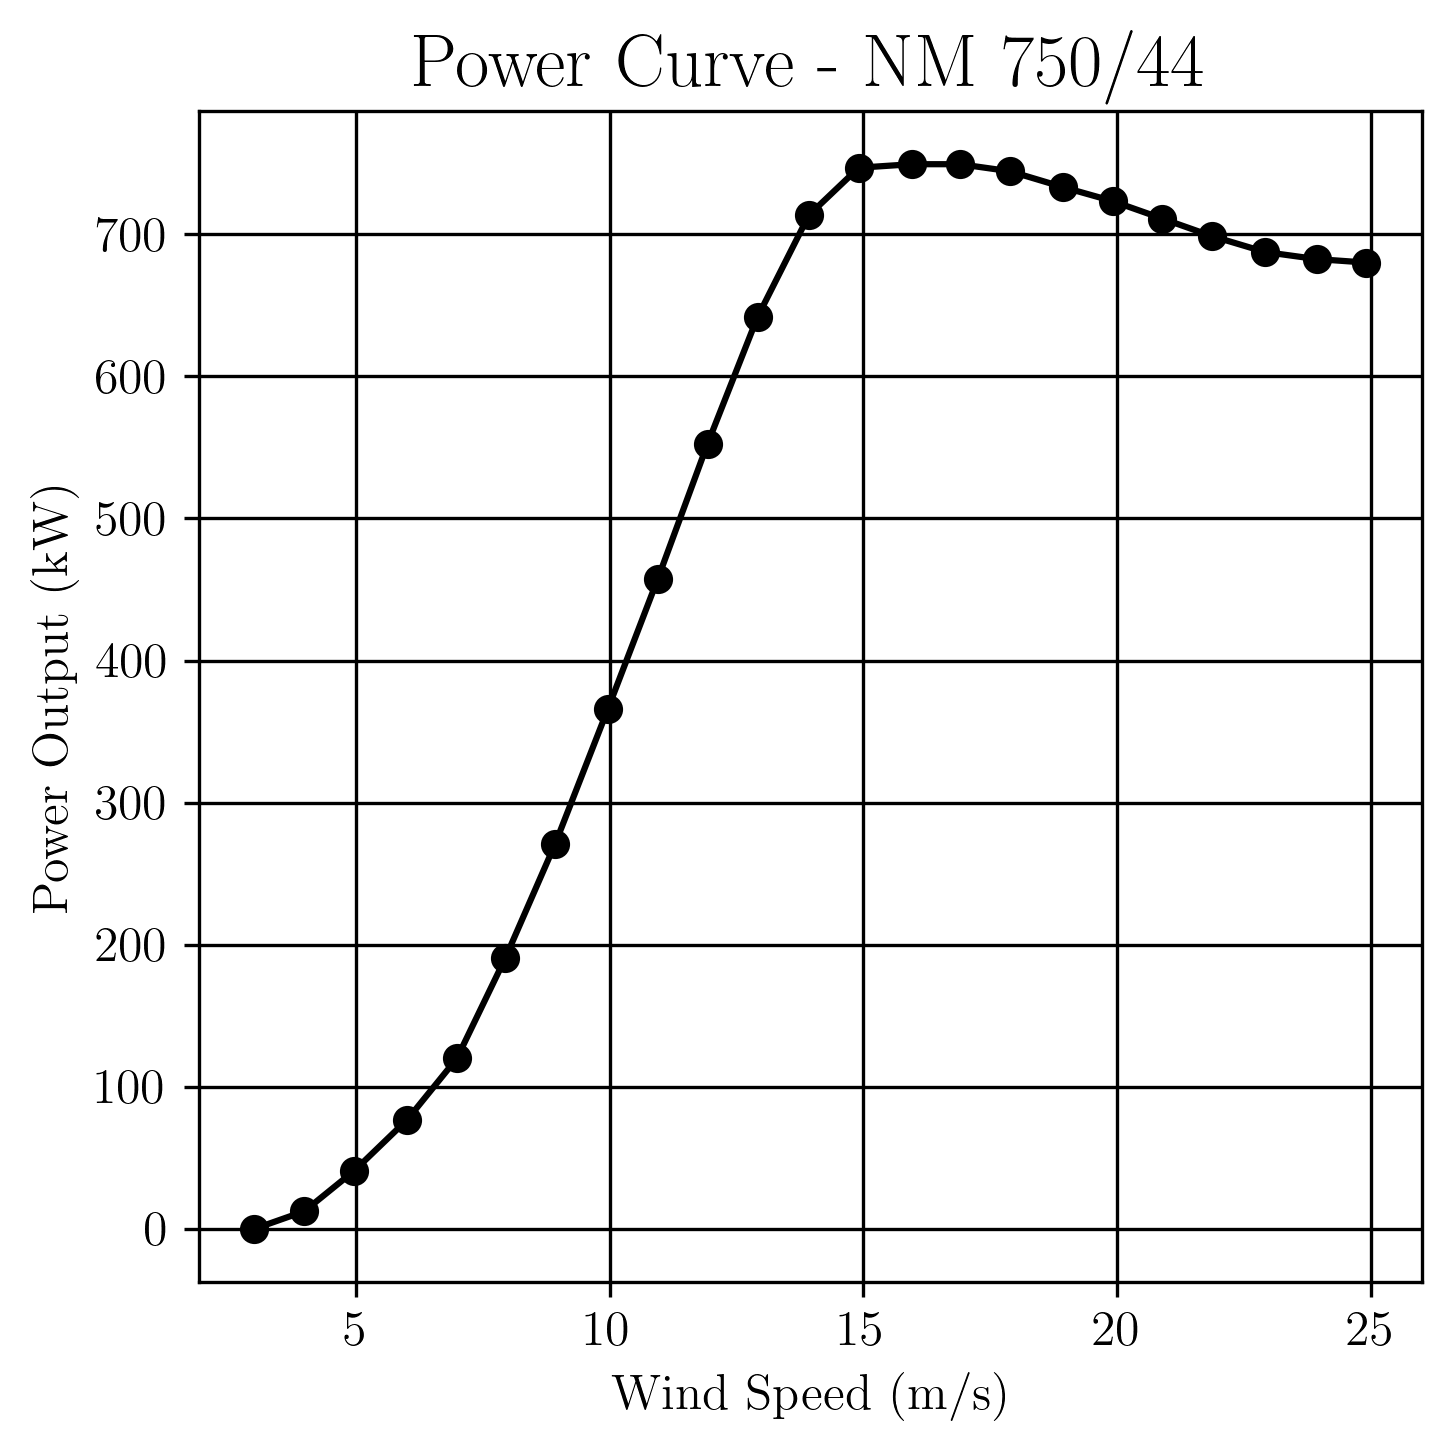

In [11]:
x = np.array([3, 3.982408660351827, 4.964817320703654, 6.006765899864682, 6.989174560216509, 7.941813261163735, 8.924221921515562, 9.96617050067659, 10.948579161028416, 11.930987821380244, 12.913396481732072, 13.925575101488498, 14.907983761840326, 15.949932341001354, 16.90257104194858, 17.884979702300406, 18.926928281461436, 19.90933694181326, 20.891745602165088, 21.874154262516914, 22.916102841677944, 23.92828146143437, 24.9106901217862])
y = np.array([0, 12.364760432766616, 40.80370942812983, 76.66151468315302, 119.93817619783617, 190.41731066460588, 270.78825347758885, 365.9969088098918, 457.49613601236473, 552.7047913446677, 641.7310664605873, 713.4466769706337, 746.8315301391035, 749.3044822256569, 749.3044822256569, 744.3585780525502, 733.2302936630603, 723.338485316847, 710.9737248840804, 698.6089644513138, 687.4806800618238, 682.5347758887171, 680.0618238021639])

plt.figure(figsize=(5, 5), dpi=300)
plt.plot(x, y, color='black', label='Data Points')
plt.scatter(x, y, color='black')
plt.title("Power Curve - NM 750/44")
plt.xlabel("Wind Speed (m/s)")
plt.ylabel("Power Output (kW)")
plt.grid(True, color='black')
plt.tight_layout()

In [12]:
wind_speed_data = concat_data(data_folder)
result = compute_power_output(wind_speed_data, x, y)
save_path = Path(data_folder) / "Power_Output_2019_2023.csv"
result.to_csv(save_path, index=False)